#Build model

##Load model ResNet50

In [1]:
from tensorflow import keras

base_model = keras.applications.ResNet50(
    weights = "imagenet",
    input_shape = (224, 224, 3),
    include_top = False)

94765736/94765736 [==============================] - 1s 0us/step


## Freeze trained model

In [2]:
base_model.trainable = False

## Add last layers

In [3]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training = False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation = "relu")(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 51381249 (196.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


## Complile model

In [4]:
model.compile(loss = keras.losses.BinaryCrossentropy(from_logits = False) ,
              metrics = [keras.metrics.BinaryAccuracy()])

#Prepare data for model to training

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    shear_range = 0.2,
    rescale = 1. / 255,
    horizontal_flip = True,
)

In [6]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/dataset/slit_brain_tumor/train',
                                       target_size = (224,224),
                                       class_mode = "binary",
                                       batch_size = 32)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/dataset/slit_brain_tumor/valid',
                                      target_size = (224,224),
                                      class_mode = "binary",
                                      batch_size = 32)

Found 3209 images belonging to 2 classes.
Found 679 images belonging to 2 classes.


# Training

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

model_path = "/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5"

callbacks = [ModelCheckpoint(model_path, verbose=1, save_best_only=True)]

model.fit(train_it,
          validation_data = valid_it,
          steps_per_epoch = train_it.samples / train_it.batch_size,
          validation_steps = valid_it.samples / valid_it.batch_size,
          callbacks = callbacks,
          epochs = 20)

Epoch 1/20
101/100 [==============================] - ETA: -3s - loss: 10.1509 - binary_accuracy: 0.5357
Epoch 1: val_loss improved from inf to 6.28852, saving model to /content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 642s 6s/step - loss: 10.1509 - binary_accuracy: 0.5357 - val_loss: 6.2885 - val_binary_accuracy: 0.5758
Epoch 2/20
101/100 [==============================] - ETA: 0s - loss: 2.5798 - binary_accuracy: 0.6042
Epoch 2: val_loss improved from 6.28852 to 1.38791, saving model to /content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5
100/100 [==============================] - 84s 832ms/step - loss: 2.5798 - binary_accuracy: 0.6042 - val_loss: 1.3879 - val_binary_accuracy: 0.6392
Epoch 3/20
101/100 [==============================] - ETA: 0s - loss: 0.8362 - binary_accuracy: 0.6659
Epoch 3: val_loss improved from 1.38791 to 0.62636, saving model to /content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5
100/100 [==============================] - 79s 787ms/step - loss: 0.8362 - binary_accuracy: 0.6659 - val_loss: 0.6264 - val_binary_accuracy: 0.6451
Epoch 4/2

#Un freeze to fine turning

In [8]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-5),
              loss = keras.losses.BinaryCrossentropy(from_logits = False) ,
              metrics = [keras.metrics.BinaryAccuracy()])

## Training with un freeze

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

model_path = "/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5"

callbacks = ModelCheckpoint(model_path, verbose=1, save_best_only = True)

model.fit(train_it,
          validation_data = valid_it,
          steps_per_epoch = train_it.samples/train_it.batch_size,
          validation_steps = valid_it.samples/valid_it.batch_size,
          callbacks = [callbacks],
          epochs = 30)

Epoch 1/30
101/100 [==============================] - ETA: 0s - loss: 0.6356 - binary_accuracy: 0.6581
Epoch 1: val_loss improved from inf to 0.54888, saving model to /content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5
100/100 [==============================] - 128s 893ms/step - loss: 0.6356 - binary_accuracy: 0.6581 - val_loss: 0.5489 - val_binary_accuracy: 0.6996
Epoch 2/30
101/100 [==============================] - ETA: 0s - loss: 0.5042 - binary_accuracy: 0.7548
Epoch 2: val_loss improved from 0.54888 to 0.53514, saving model to /content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5
100/100 [==============================] - 112s 1s/step - loss: 0.5042 - binary_accuracy: 0.7548 - val_loss: 0.5351 - val_binary_accuracy: 0.7349
Epoch 3/30
101/100 [==============================] - ETA: 0s - loss: 0.4577 - binary_accuracy: 0.7753
Epoch 3: val_loss improved from 0.53514 to 0.42856, saving

# Test

Found 679 images belonging to 2 classes.
test_data.class_indices:  {'BrainTumor': 0, 'Healthey': 1}
22/22 [==============================] - 4s 142ms/step - loss: 0.0953 - binary_accuracy: 0.9779
0.9779086709022522
(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
8.141532e-09
Has a brain tumor


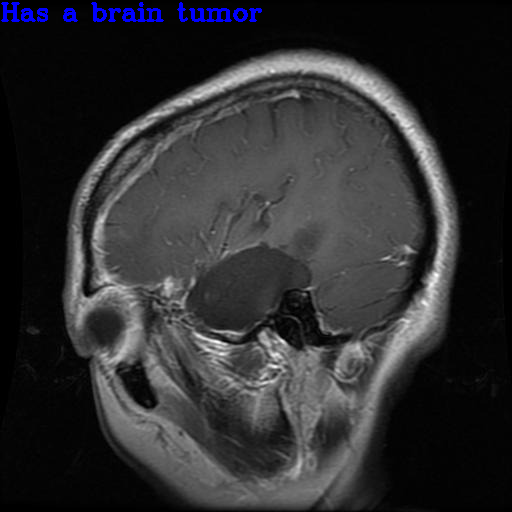

In [2]:
from locale import normalize
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import keras
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

TEST_DIR = "/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/dataset/slit_brain_tumor/test"

test_datagen = image.ImageDataGenerator( rescale= 1. / 255)
test_data = test_datagen.flow_from_directory(directory = TEST_DIR , target_size = (224,224) , batch_size = 32 , class_mode ='binary')

# lets print the classes :
print("test_data.class_indices: ", test_data.class_indices)

#load the saved model :
model = load_model('/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/files/ResNet50_classification.h5')

#print(model.summary() )

acc = model.evaluate(x=test_data)[1]
print(acc)

# load an image from the test folder
imagePath = "/content/drive/MyDrive/Deep_learning/image_classification/brain_tumor/dataset/slit_brain_tumor/test/BrainTumor/Cancer (100).jpg"

img = image.load_img(imagePath, target_size = (224,224))
i = image.img_to_array(img) # convert to array
i = i / 255 # -> normalize to our model
print(i.shape)

input_arr = np.array([i]) # add another dimention
print(input_arr.shape)


# run the prediction
predictions = model.predict(input_arr)[0][0]
print(predictions)


# since it is binary if the result is close to 0 it is Tumor , and if it close to 1 it is healthy
result = round(predictions)
if result == 0 :
    text = 'Has a brain tumor'
else :
    text = "Brain healthy"

print(text)

imgResult = cv2.imread(imagePath)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(imgResult, text, (0,20), font, 0.8 , (255,0,0),2 )
cv2_imshow(imgResult)


Found 679 images belonging to 2 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

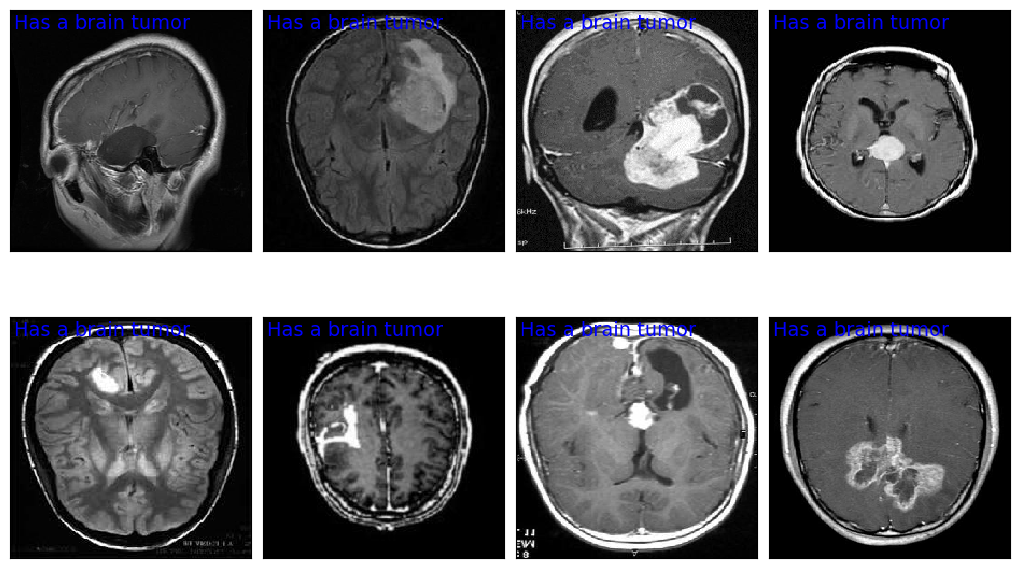

In [3]:
test_datagen = image.ImageDataGenerator(rescale= 1. / 255)
test_data = test_datagen.flow_from_directory(directory = TEST_DIR,
                                             target_size = (224,224) ,
                                             batch_size = 679,
                                             class_mode = 'binary',
                                             shuffle = False)

x_valid, label_batch = next(test_data)
label_batch = label_batch.astype(int)
print(label_batch)

class_names = ['Has a brain tumor', 'Brain healthy']
fig = plt.figure(figsize = (10, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

resual = []

predicted = model.predict(x_valid)
results = []

for i in range(len(predicted)):
    if predicted[i] < 0.5:
        results.append(0)
    else:
        results.append(1)
results = np.array(results)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(x_valid[i,:],cmap=plt.cm.gray_r, interpolation='nearest')

    if results[i] == label_batch[i]:
        ax.text(3, 17, class_names[results[i]], color = 'blue', fontsize = 14)
    else:
        ax.text(3, 17, class_names[results[i]], color = 'red', fontsize = 14)


# Model evaluation

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(label_batch, results)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(label_batch, results, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(label_batch, results, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(label_batch, results, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(label_batch, results, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(label_batch, results)
print(matrix)

Accuracy: 0.977909
Precision: 0.977045
Recall: 0.978682
F1 score: 0.977757
ROC AUC: 0.978682
[[360  11]
 [  4 304]]


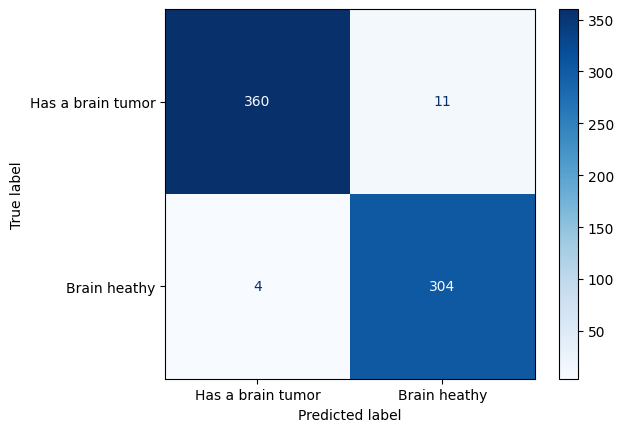

In [5]:
labels = ["Has a brain tumor", "Brain heathy"]

# cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()